In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [65]:
data=pd.read_csv('./dataset/Video Games Sales.csv')
data.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


Percentage of Missing values
---

In [67]:
((data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100).round(2).to_frame()

,0
Year,1.52
Publisher,0.10


<AxesSubplot: >

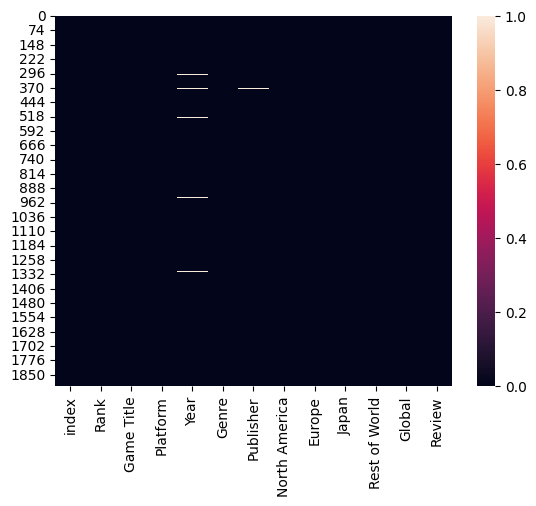

In [68]:
sb.heatmap(data.isnull())

In [69]:
data.dropna(subset=['Year','Publisher'],inplace=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1878 non-null   int64  
 1   Rank           1878 non-null   int64  
 2   Game Title     1878 non-null   object 
 3   Platform       1878 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1878 non-null   object 
 6   Publisher      1878 non-null   object 
 7   North America  1878 non-null   float64
 8   Europe         1878 non-null   float64
 9   Japan          1878 non-null   float64
 10  Rest of World  1878 non-null   float64
 11  Global         1878 non-null   float64
 12  Review         1878 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 205.4+ KB


Top 10 Popular Platforms
---

In [71]:
cnames=data['Platform'].value_counts().index
cvalues=data['Platform'].value_counts().values

In [72]:
fig=px.pie(data,values=cvalues[:10],names=cnames[:10])
fig.update_layout(width=700,height=550)
fig.show()

Genres which have received more than 90% rating or review
----

In [73]:
gd=data[data['Review']>90]['Genre'].value_counts().reset_index().rename(columns={'index':'genre','Genre':'count'})
gd

,genre,count
0,Action,40
1,Role-Playing,35
2,Shooter,25
3,Platform,20
4,Adventure,18
5,Racing,12
6,Sports,12
7,Strategy,10
8,Fighting,9
9,Misc,3


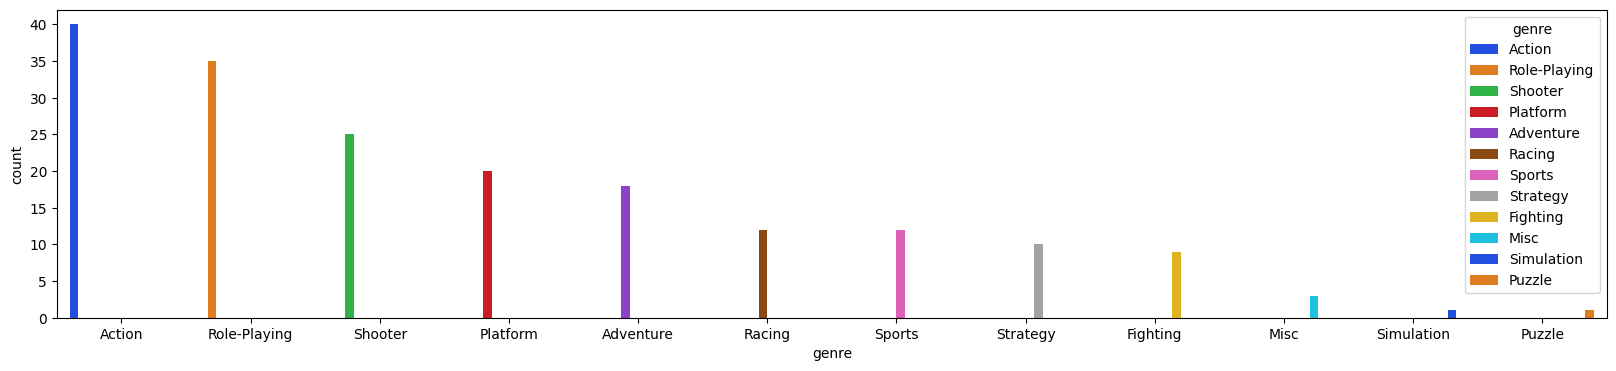

In [74]:
plt.figure(figsize=(20, 4))
sb.barplot(
    x='genre',
    y='count',
    hue='genre',
    data=gd,
    palette=sb.color_palette('bright'),
)
plt.show()


Title which has received the highest sales Globally 
---

In [75]:
data[data['Global']==data['Global'].max()]['Game Title'].tolist()[0]

'Wii Sports'

Title which has received the highest review rating
---

In [76]:
data[data['Review']==data['Review'].max()]['Game Title'].tolist()[0]

'The Legend of Zelda: Ocarina of Time'

Years in which more than 100 games were launched
---

In [77]:
yd=data['Year'].value_counts().head(10).reset_index().rename(columns={'index':'year','Year':'count'})
yd

,year,count
0,2008.0,184
1,2007.0,157
2,2009.0,131
3,2010.0,130
4,2004.0,122
5,2003.0,114
6,2002.0,110
7,2005.0,105
8,2006.0,103
9,2011.0,100


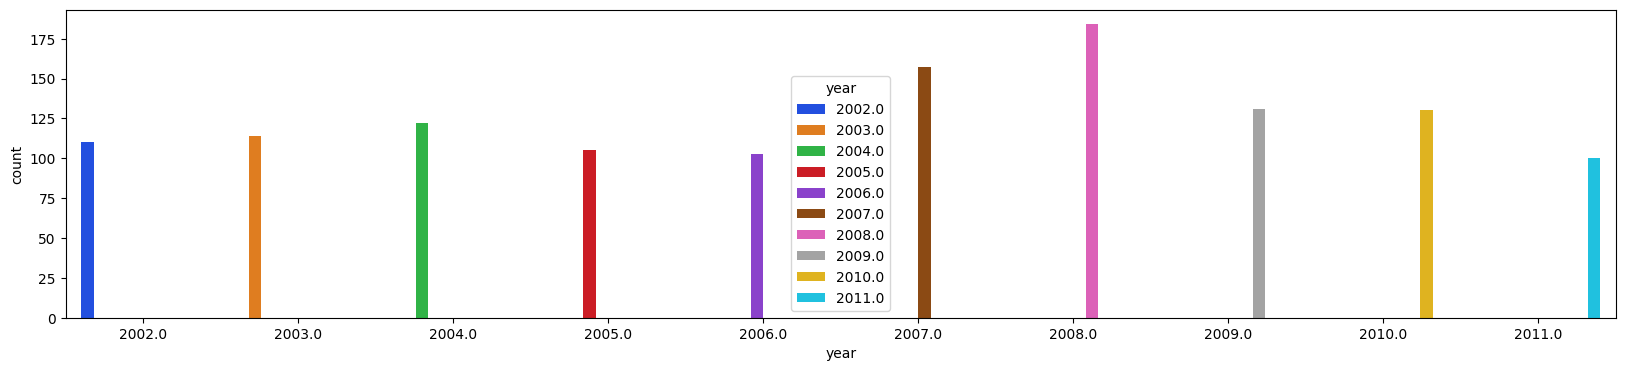

In [78]:
plt.figure(figsize=(20, 4))
sb.barplot(
    x='year',
    y='count',
    hue='year',
    data=yd,
    palette=sb.color_palette('bright'),
)
plt.show()

Corrrelation between the Columns
---

<AxesSubplot: >

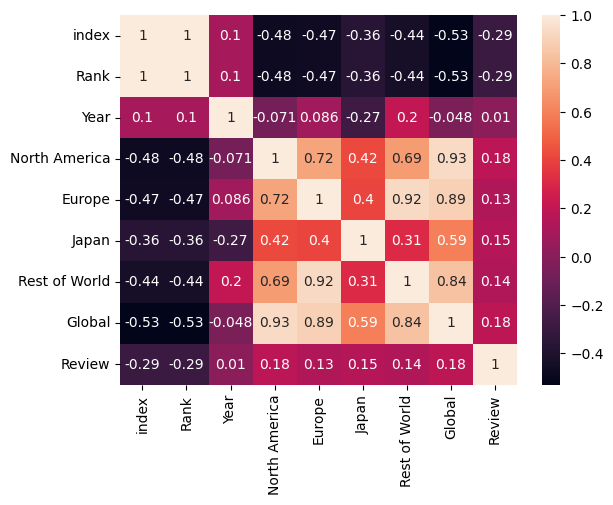

In [79]:
sb.heatmap(data.corr(),annot=True)

Sales based on Genre in different countries
----


In [80]:
sales_types = ['Global', 'North America', 'Europe', 'Japan', 'Rest of World']
for sales_type in sales_types:
    sales_by_genre = data.groupby('Genre')[sales_type].sum()
    sales_by_genre = sales_by_genre.sort_values(ascending=False)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=sales_by_genre.index, y=sales_by_genre.values))
    fig.update_layout(title=f'{sales_type} Sales by Genre',
                      xaxis_title='Genre',
                      yaxis_title=f'{sales_type} Sales',
                      hovermode='x unified')
    fig.show()

Global sales by Genre over the Years
---

In [81]:
genres = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Racing', 'Fighting']
fig = make_subplots(rows=4, cols=2, subplot_titles=genres)
for i, genre in enumerate(genres, 1):
    genre_data = data[data['Genre'] == genre]
    sales_by_year = genre_data.groupby('Year')[['Global']].sum().reset_index()
    fig.add_trace(go.Scatter(x=sales_by_year['Year'], y=sales_by_year['Global'],
                             mode='lines+markers', name=genre,showlegend=False),
                  row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1)
fig.update_layout(title='Global Sales by Genre Over Years',
                  xaxis_title='Year',
                  yaxis_title='Global Sales (millions)',
                  hovermode='x unified',
                  height=1200)  
fig.show()